In [2]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from wordcloud import STOPWORDS
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from collections import Counter
from sklearn.cluster import KMeans
import gensim
from gensim import corpora
import nltk
from nltk import FreqDist
from textblob import TextBlob
from transformers import pipeline
import networkx as nx

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')   

import warnings
warnings.filterwarnings('ignore')

2025-07-13 06:11:55.029756: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752387115.392796     100 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752387115.504215     100 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
train_path = "/kaggle/input/nlp-getting-started/train.csv"
test_path = "/kaggle/input/nlp-getting-started/test.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [4]:
df_train.drop_duplicates(inplace=True)
df_train.dropna(subset=['text'], inplace=True)

class_distribution = df_train['target'].value_counts()
dataset_size = df_train.shape

In [5]:

class_distribution

target
0    4342
1    3271
Name: count, dtype: int64

# Text Exploration

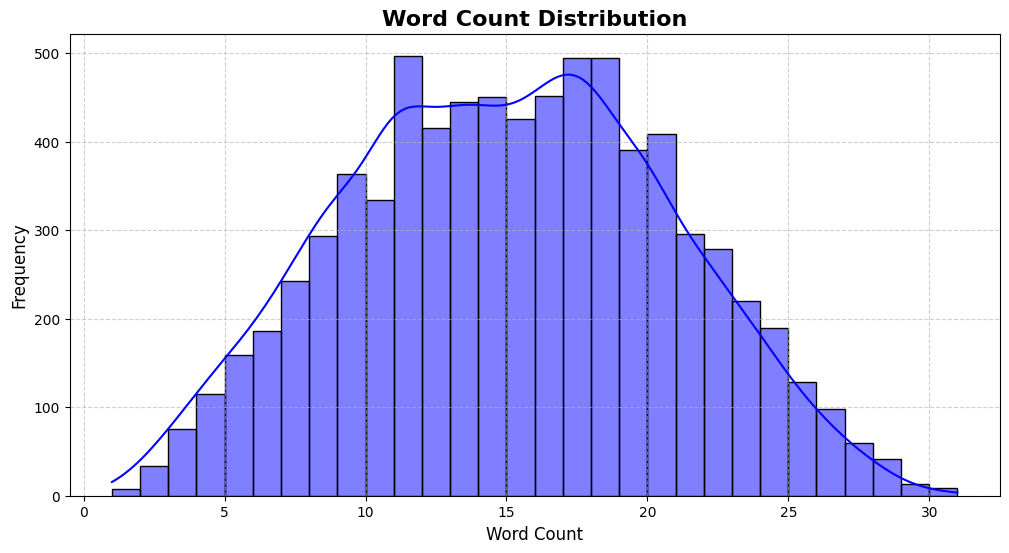

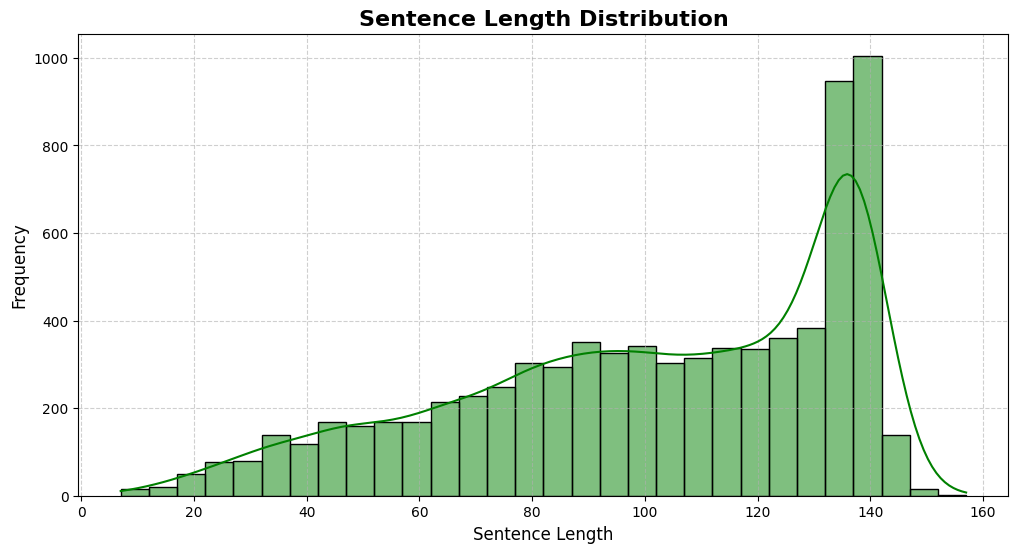

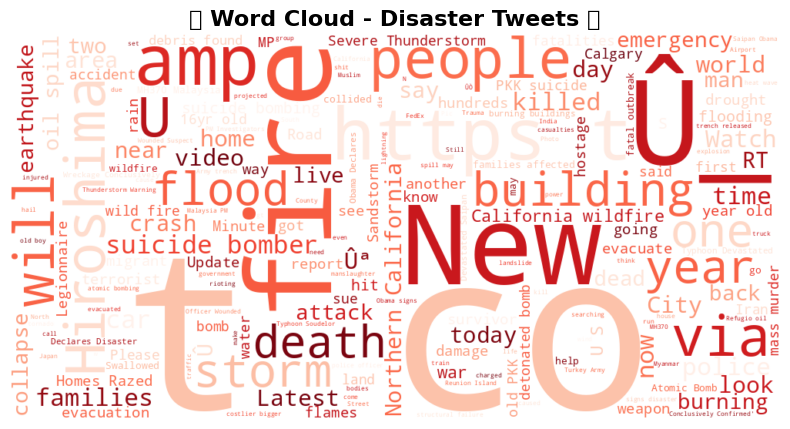

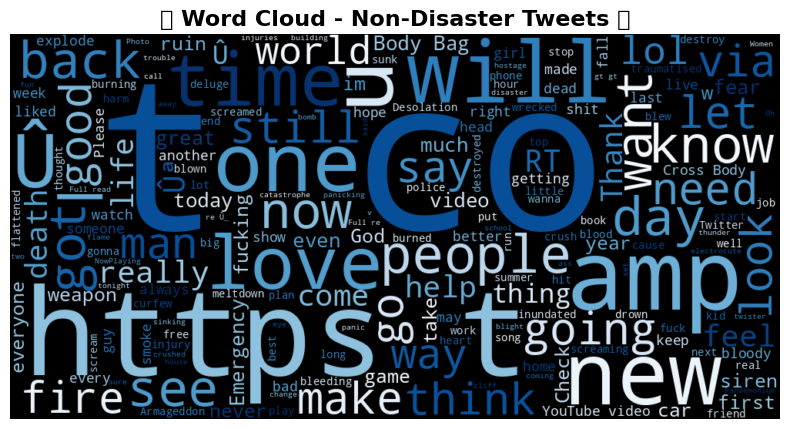

In [6]:
df_train.drop_duplicates(inplace=True)
df_train.dropna(subset=['text'], inplace=True)

df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))
df_train['sentence_length'] = df_train['text'].apply(lambda x: len(str(x)))

vocab = set(" ".join(df_train['text']).split())

plt.figure(figsize=(12, 6))
sns.histplot(df_train['word_count'], bins=30, kde=True, color="blue")
plt.title("Word Count Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Word Count", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df_train['sentence_length'], bins=30, kde=True, color="green")
plt.title("Sentence Length Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Sentence Length", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

disaster_texts = " ".join(df_train[df_train['target'] == 1]['text'])
non_disaster_texts = " ".join(df_train[df_train['target'] == 0]['text'])

wordcloud_disaster = WordCloud(width=1000, height=500, background_color='white', colormap='Reds').generate(disaster_texts)
wordcloud_non_disaster = WordCloud(width=1000, height=500, background_color='black', colormap='Blues').generate(non_disaster_texts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_disaster, interpolation="bilinear")
plt.axis("off")
plt.title("🔥 Word Cloud - Disaster Tweets 🔥", fontsize=16, fontweight='bold')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_disaster, interpolation="bilinear")
plt.axis("off")
plt.title("💬 Word Cloud - Non-Disaster Tweets 💬", fontsize=16, fontweight='bold')
plt.show()


# N-gram Analysis (Bigrams, Trigrams) 

In [7]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

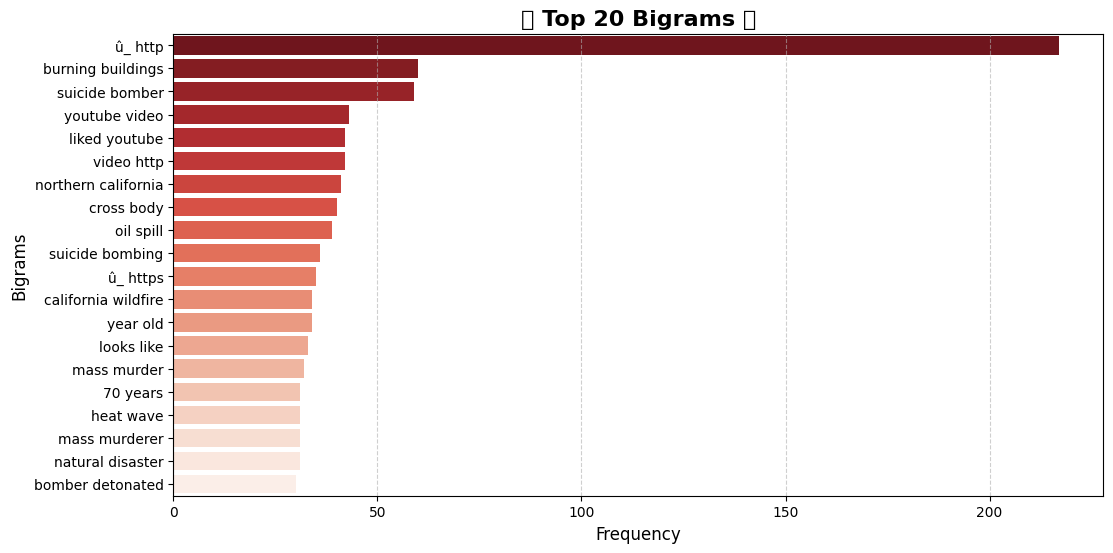

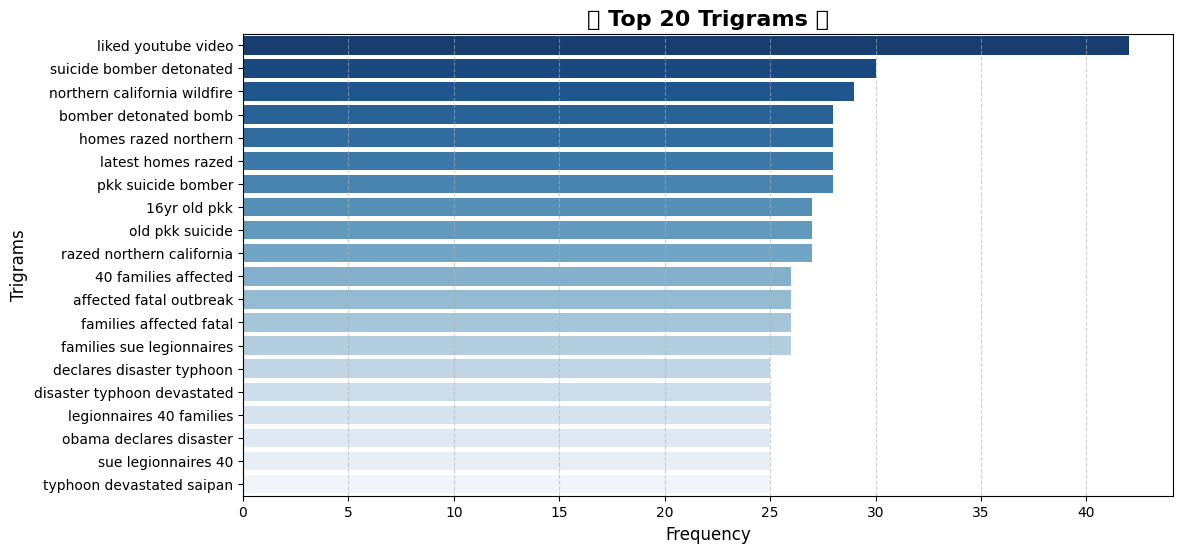

In [8]:
vectorizer_bigram = CountVectorizer(ngram_range=(2,2), stop_words='english')
X_bigram = vectorizer_bigram.fit_transform(df_train['text'])
bigram_freq = dict(zip(vectorizer_bigram.get_feature_names_out(), X_bigram.toarray().sum(axis=0)))
top_bigrams = Counter(bigram_freq).most_common(20)

vectorizer_trigram = CountVectorizer(ngram_range=(3,3), stop_words='english')
X_trigram = vectorizer_trigram.fit_transform(df_train['text'])
trigram_freq = dict(zip(vectorizer_trigram.get_feature_names_out(), X_trigram.toarray().sum(axis=0)))
top_trigrams = Counter(trigram_freq).most_common(20)

bigrams, bigram_counts = zip(*top_bigrams)
trigrams, trigram_counts = zip(*top_trigrams)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(bigram_counts), y=list(bigrams), palette="Reds_r")
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Bigrams", fontsize=12)
plt.title("🔥 Top 20 Bigrams 🔥", fontsize=16, fontweight='bold')
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=list(trigram_counts), y=list(trigrams), palette="Blues_r")
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Trigrams", fontsize=12)
plt.title("💬 Top 20 Trigrams 💬", fontsize=16, fontweight='bold')
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()


# Text Cleaning & Preprocessing

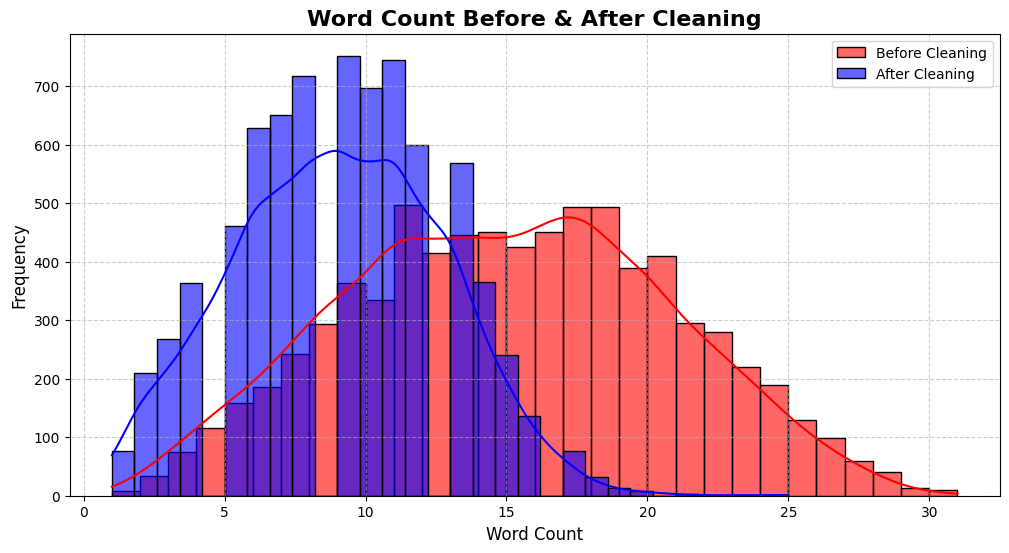

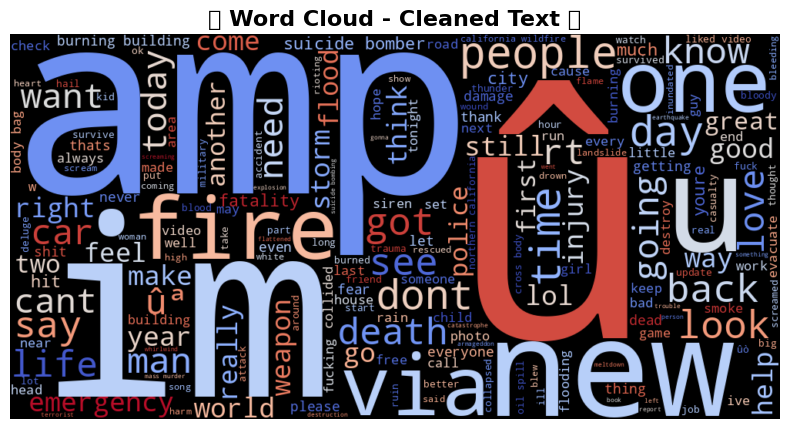

In [9]:
df_train['text_cleaned'] = df_train['text'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE))
df_train['text_cleaned'] = df_train['text_cleaned'].apply(lambda x: re.sub(r'\@\w+|\#','', x))
df_train['text_cleaned'] = df_train['text_cleaned'].apply(lambda x: x.lower())
df_train['text_cleaned'] = df_train['text_cleaned'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_train['text_cleaned'] = df_train['text_cleaned'].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords.words('english')]))

lemmatizer = WordNetLemmatizer()
df_train['text_cleaned'] = df_train['text_cleaned'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

word_count_before = df_train['text'].apply(lambda x: len(str(x).split()))
word_count_after = df_train['text_cleaned'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 6))
sns.histplot(word_count_before, bins=30, kde=True, color="red", label="Before Cleaning", alpha=0.6)
sns.histplot(word_count_after, bins=30, kde=True, color="blue", label="After Cleaning", alpha=0.6)
plt.title("Word Count Before & After Cleaning", fontsize=16, fontweight='bold')
plt.xlabel("Word Count", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

wordcloud_cleaned = WordCloud(width=1000, height=500, background_color='black', colormap='coolwarm').generate(" ".join(df_train['text_cleaned']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_cleaned, interpolation="bilinear")
plt.axis("off")
plt.title("🌟 Word Cloud - Cleaned Text 🌟", fontsize=16, fontweight='bold')
plt.show()


# Word Cloud Visualization

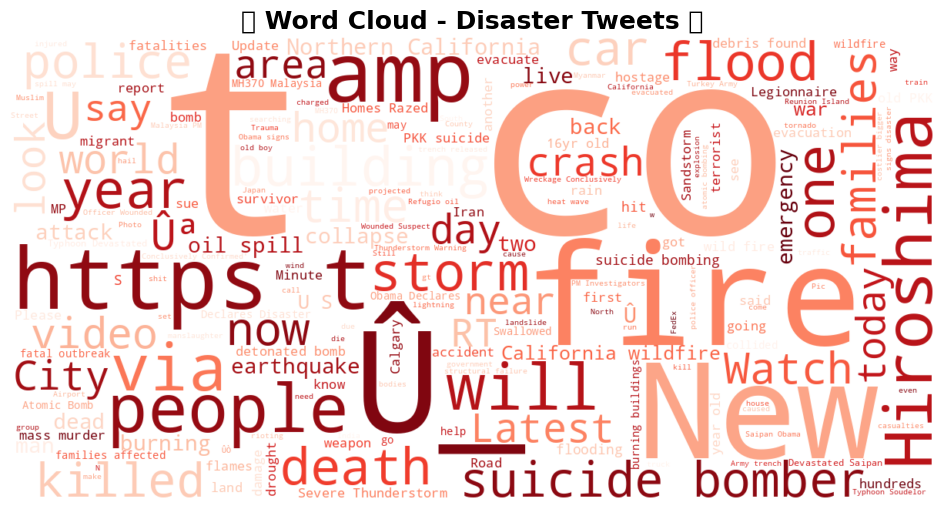

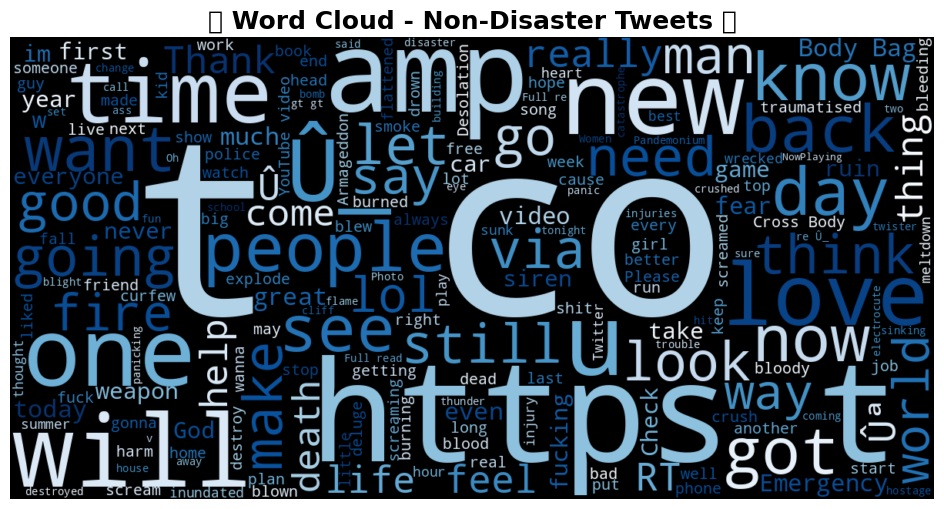

In [10]:
disaster_texts = " ".join(df_train[df_train['target'] == 1]['text'])
non_disaster_texts = " ".join(df_train[df_train['target'] == 0]['text'])

wordcloud_disaster = WordCloud(width=1200, height=600, background_color='white', colormap='Reds', max_words=200).generate(disaster_texts)
wordcloud_non_disaster = WordCloud(width=1200, height=600, background_color='black', colormap='Blues', max_words=200).generate(non_disaster_texts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_disaster, interpolation="bilinear")
plt.axis("off")
plt.title("🔥 Word Cloud - Disaster Tweets 🔥", fontsize=18, fontweight='bold')
plt.show()

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_non_disaster, interpolation="bilinear")
plt.axis("off")
plt.title("💬 Word Cloud - Non-Disaster Tweets 💬", fontsize=18, fontweight='bold')
plt.show()


# Most Common Words in Disaster and Non-Disaster Tweets

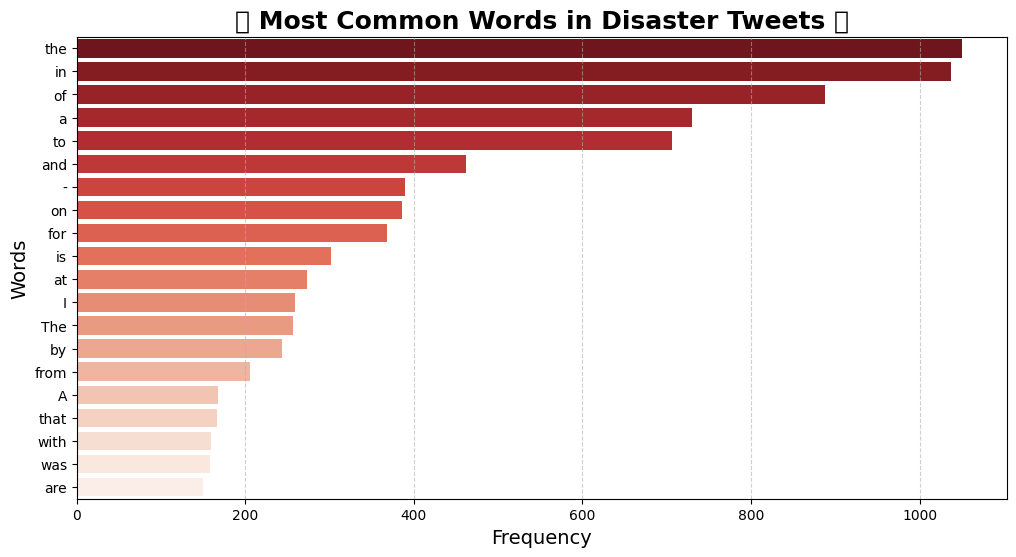

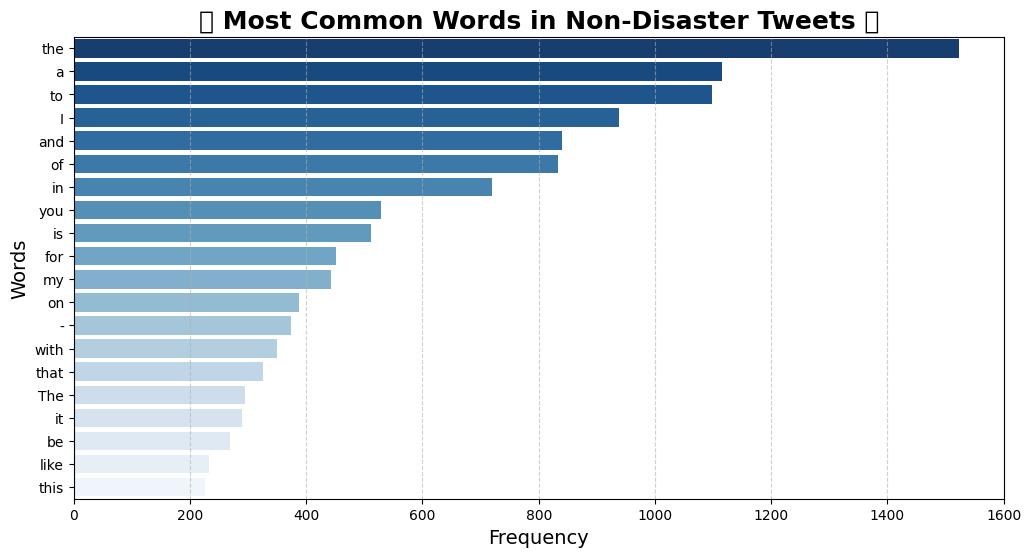

In [11]:
disaster_words = " ".join(df_train[df_train['target'] == 1]['text']).split()
non_disaster_words = " ".join(df_train[df_train['target'] == 0]['text']).split()

common_words_disaster = Counter(disaster_words).most_common(20)
common_words_non_disaster = Counter(non_disaster_words).most_common(20)

words_disaster, count_disaster = zip(*common_words_disaster)
words_non_disaster, count_non_disaster = zip(*common_words_non_disaster)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(count_disaster), y=list(words_disaster), palette="Reds_r")
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Words", fontsize=14)
plt.title("🔥 Most Common Words in Disaster Tweets 🔥", fontsize=18, fontweight='bold')
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=list(count_non_disaster), y=list(words_non_disaster), palette="Blues_r")
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Words", fontsize=14)
plt.title("💬 Most Common Words in Non-Disaster Tweets 💬", fontsize=18, fontweight='bold')
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()


# Named Entity Recognition (NER)

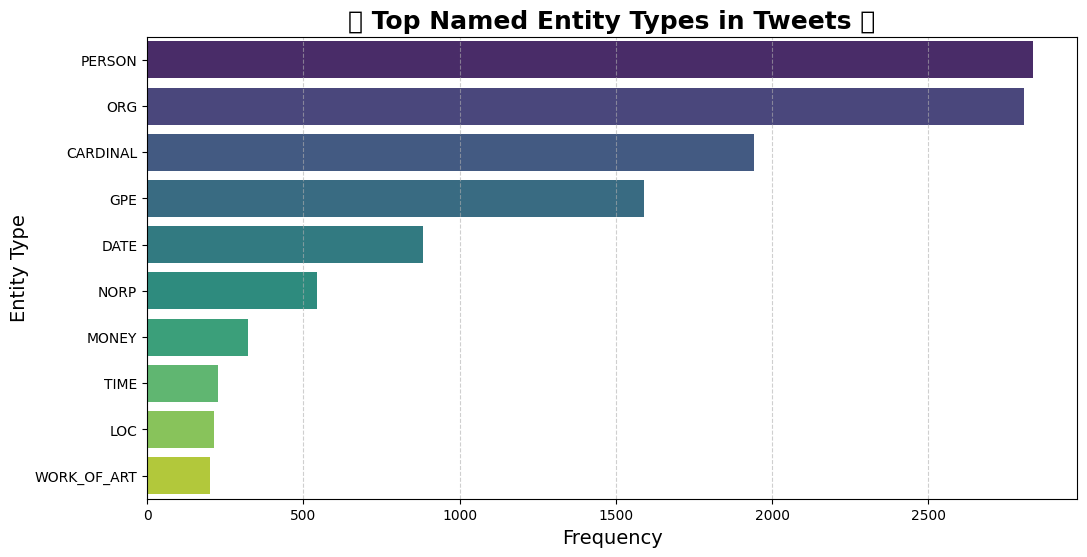

In [12]:
nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

df_train['entities'] = df_train['text'].apply(lambda x: extract_entities(x))

all_entities = [ent for sublist in df_train['entities'] for ent in sublist]
entity_counts = Counter([ent[1] for ent in all_entities])

entity_types, entity_freq = zip(*entity_counts.most_common(10))

plt.figure(figsize=(12, 6))
sns.barplot(x=list(entity_freq), y=list(entity_types), palette="viridis")
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Entity Type", fontsize=14)
plt.title("🌟 Top Named Entity Types in Tweets 🌟", fontsize=18, fontweight='bold')
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

# Sentiment Analysis

In [13]:
!pip install textblob


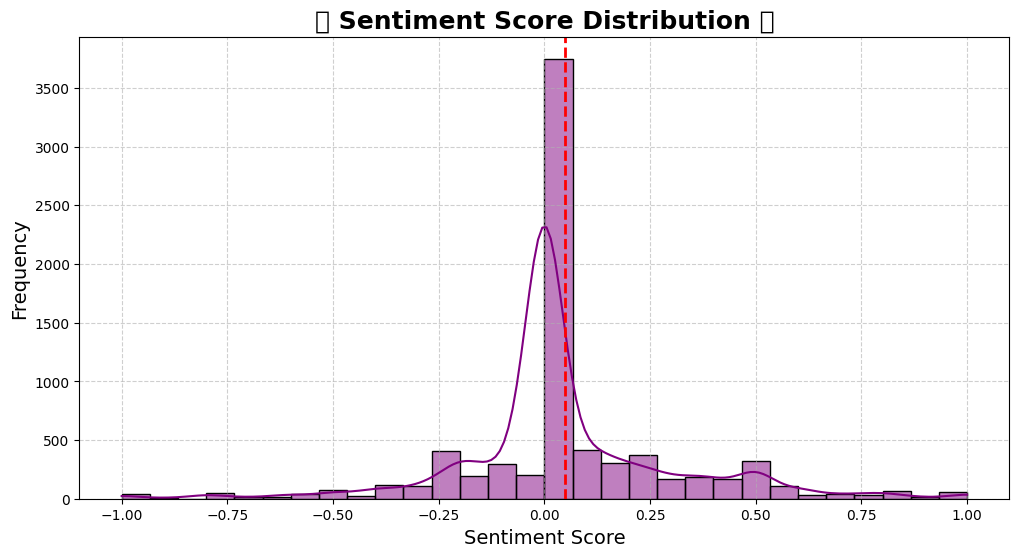

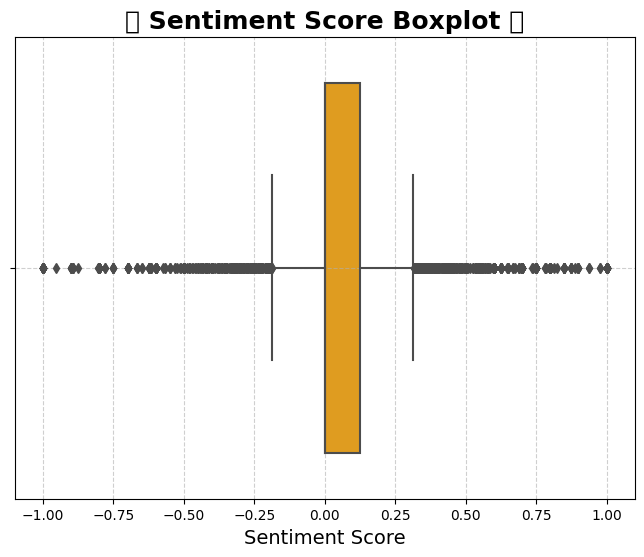

In [14]:
df_train['sentiment'] = df_train['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(12, 6))
sns.histplot(df_train['sentiment'], bins=30, kde=True, color="purple")
plt.axvline(df_train['sentiment'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Sentiment Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("📊 Sentiment Score Distribution 📊", fontsize=18, fontweight='bold')
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train['sentiment'], color="orange")
plt.xlabel("Sentiment Score", fontsize=14)
plt.title("📦 Sentiment Score Boxplot 📦", fontsize=18, fontweight='bold')
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# TF-IDF Representation

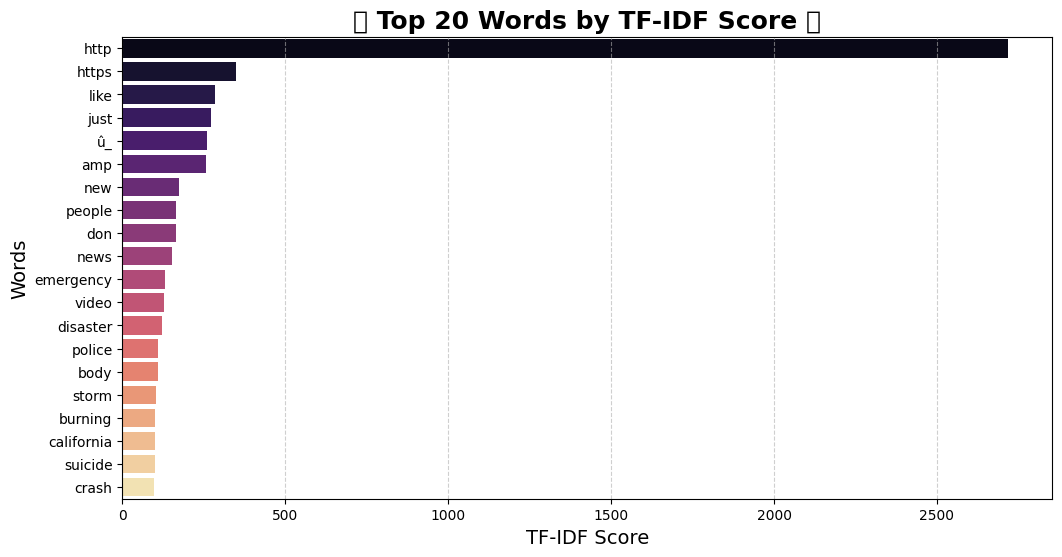

In [15]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
X_tfidf = tfidf_vectorizer.fit_transform(df_train['text'])

tfidf_scores = dict(zip(tfidf_vectorizer.get_feature_names_out(), X_tfidf.toarray().sum(axis=0)))
top_tfidf_words = Counter(tfidf_scores).most_common(20)

words, scores = zip(*top_tfidf_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(scores), y=list(words), palette="magma")
plt.xlabel("TF-IDF Score", fontsize=14)
plt.ylabel("Words", fontsize=14)
plt.title("🔥 Top 20 Words by TF-IDF Score 🔥", fontsize=18, fontweight='bold')
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()


# Word2Vec Embeddings

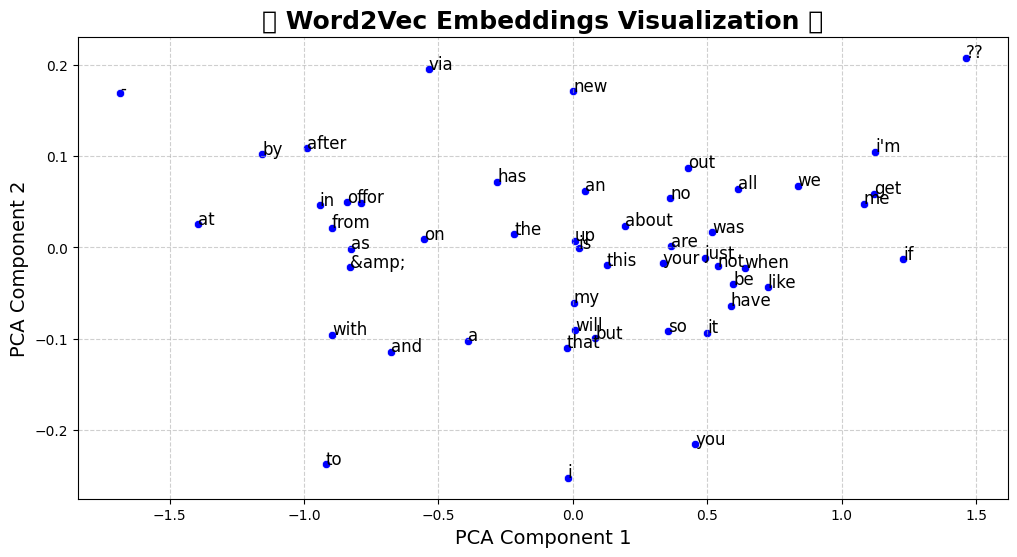

In [16]:
df_train['tokenized_text'] = df_train['text'].apply(lambda x: x.lower().split())

word2vec_model = gensim.models.Word2Vec(sentences=df_train['tokenized_text'], vector_size=100, window=5, min_count=2, workers=4)

words = list(word2vec_model.wv.index_to_key)[:50]
word_vectors = np.array([word2vec_model.wv[word] for word in words])

pca = PCA(n_components=2)
word_vecs_2d = pca.fit_transform(word_vectors)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=word_vecs_2d[:, 0], y=word_vecs_2d[:, 1], color="blue")

for i, word in enumerate(words):
    plt.text(word_vecs_2d[i, 0], word_vecs_2d[i, 1], word, fontsize=12)

plt.title("🔥 Word2Vec Embeddings Visualization 🔥", fontsize=18, fontweight='bold')
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# Hashtags & Mentions Analysis

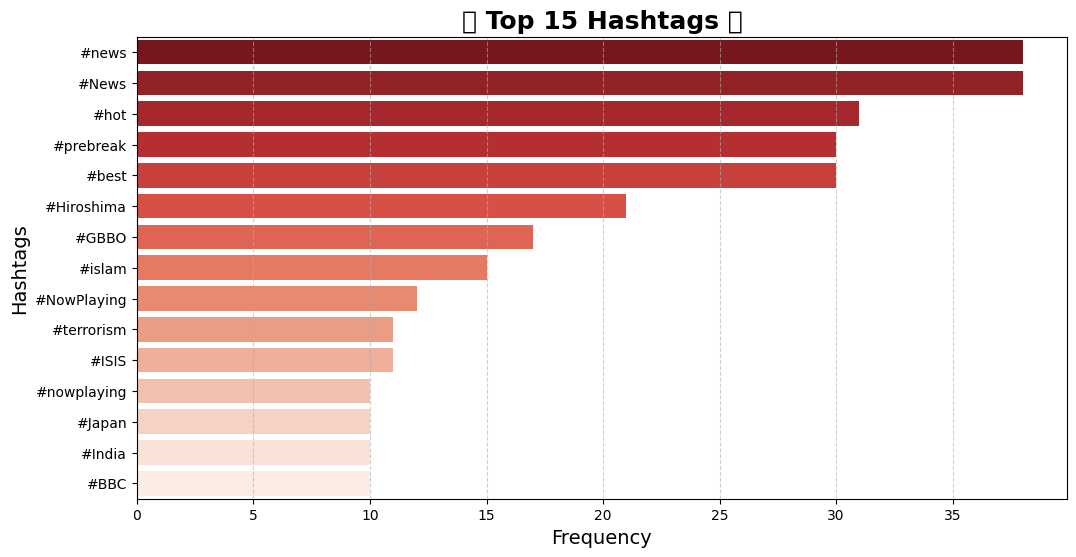

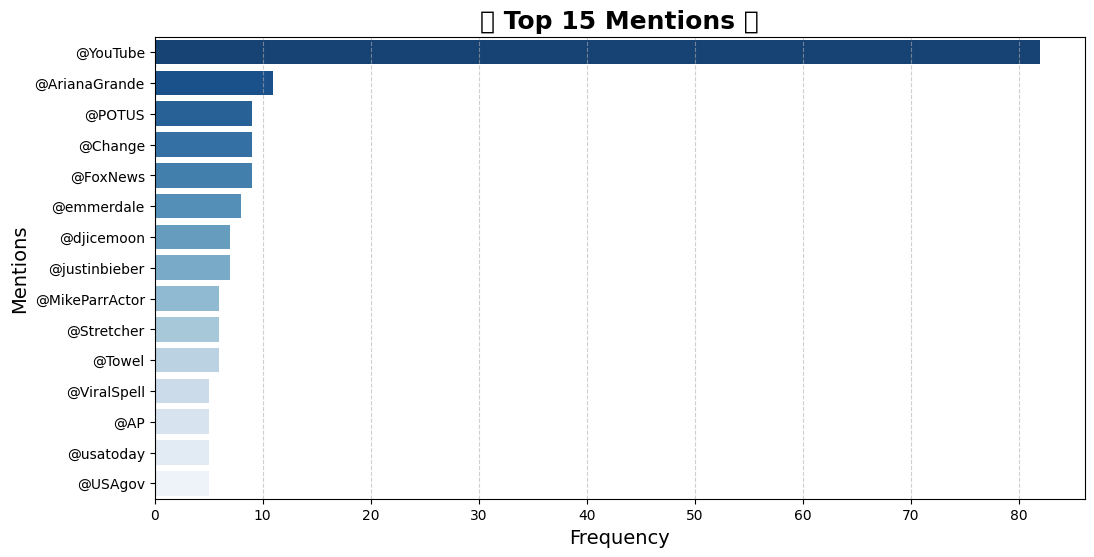

In [18]:
df_train['hashtags'] = df_train['text'].apply(lambda x: re.findall(r'#\w+', x))
df_train['mentions'] = df_train['text'].apply(lambda x: re.findall(r'@\w+', x))

all_hashtags = [tag for sublist in df_train['hashtags'] for tag in sublist]
all_mentions = [mention for sublist in df_train['mentions'] for mention in sublist]

hashtag_counts = Counter(all_hashtags).most_common(15)
mention_counts = Counter(all_mentions).most_common(15)

hashtags, hashtag_freqs = zip(*hashtag_counts)
mentions, mention_freqs = zip(*mention_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(hashtag_freqs), y=list(hashtags), palette="Reds_r")
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Hashtags", fontsize=14)
plt.title("🔥 Top 15 Hashtags 🔥", fontsize=18, fontweight='bold')
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=list(mention_freqs), y=list(mentions), palette="Blues_r")
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Mentions", fontsize=14)
plt.title("💬 Top 15 Mentions 💬", fontsize=18, fontweight='bold')
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()


# Topic Modeling with LDA

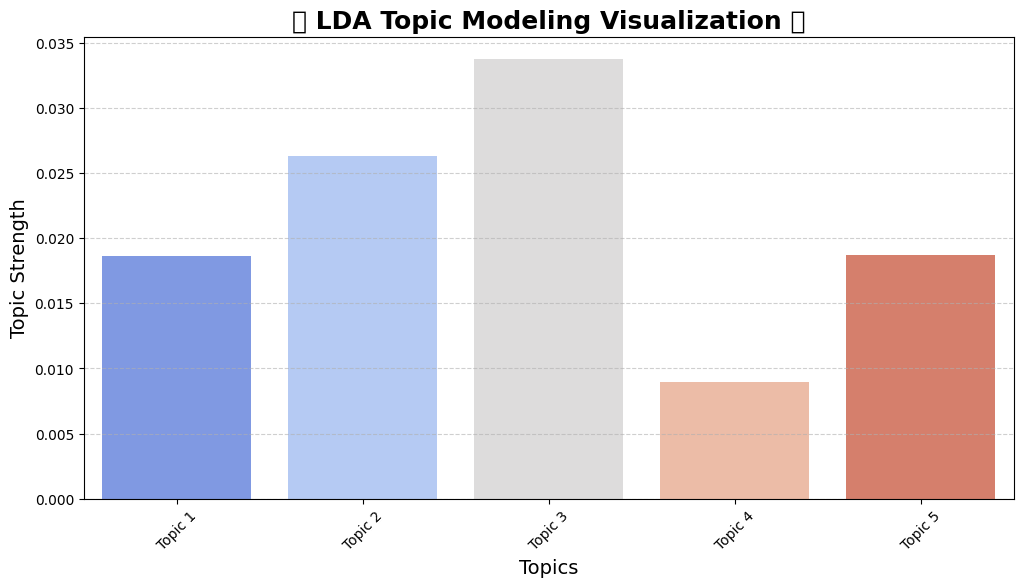


🔹 Topic 1:
the
of
to
-
in

🔹 Topic 2:
the
of
for
in
a

🔹 Topic 3:
the
a
to
i
and

🔹 Topic 4:
in
of
for
to
by

🔹 Topic 5:
in
-
of
by
suicide


In [19]:
df_train['tokenized_text'] = df_train['text'].apply(lambda x: x.lower().split())

dictionary = corpora.Dictionary(df_train['tokenized_text'])
corpus = [dictionary.doc2bow(text) for text in df_train['tokenized_text']]

lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

topics = lda_model.print_topics(num_words=5)
topic_labels = [f"Topic {i+1}" for i in range(len(topics))]
topic_words = ["\n".join([word.split('*')[1].strip().replace('"', '') for word in topic[1].split('+')]) for topic in topics]

plt.figure(figsize=(12, 6))
sns.barplot(x=topic_labels, y=[lda_model.show_topic(i, topn=5)[0][1] for i in range(5)], palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Topics", fontsize=14)
plt.ylabel("Topic Strength", fontsize=14)
plt.title("🔥 LDA Topic Modeling Visualization 🔥", fontsize=18, fontweight='bold')
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

for i, topic in enumerate(topic_words):
    print(f"\n🔹 {topic_labels[i]}:\n{topic}")


# Clustering & Dimensionality Reduction

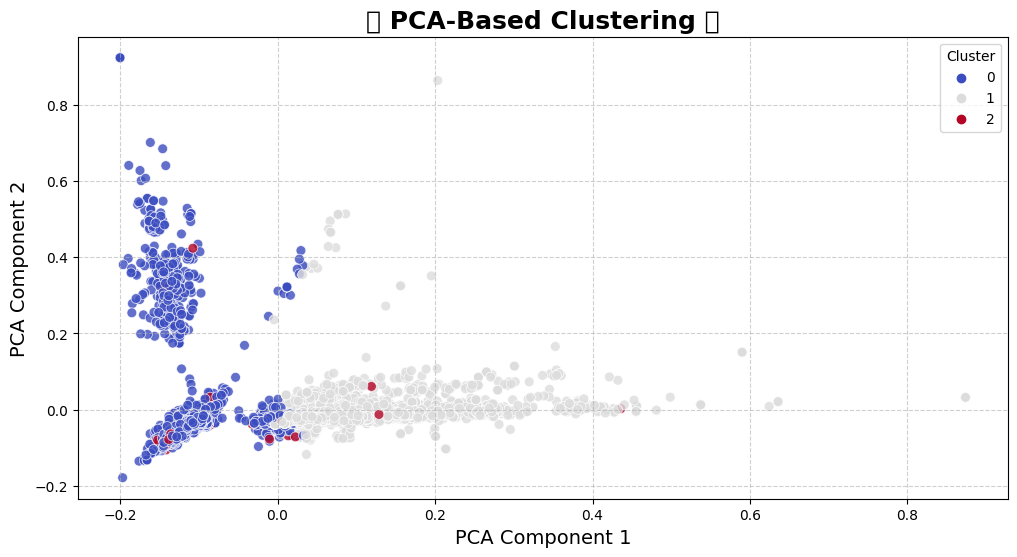

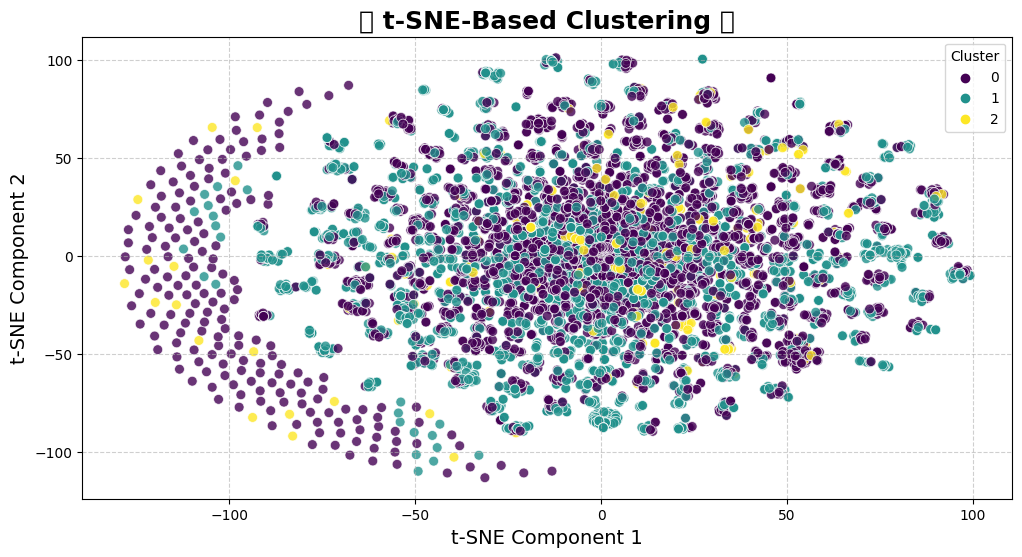

In [20]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_tfidf = tfidf_vectorizer.fit_transform(df_train['text'])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_tfidf.toarray())

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_tfidf.toarray())

plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="coolwarm", s=50, alpha=0.8)
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)
plt.title("🔥 PCA-Based Clustering 🔥", fontsize=18, fontweight='bold')
plt.legend(title="Cluster")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=clusters, palette="viridis", s=50, alpha=0.8)
plt.xlabel("t-SNE Component 1", fontsize=14)
plt.ylabel("t-SNE Component 2", fontsize=14)
plt.title("💬 t-SNE-Based Clustering 💬", fontsize=18, fontweight='bold')
plt.legend(title="Cluster")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# Network Graph of Mentions

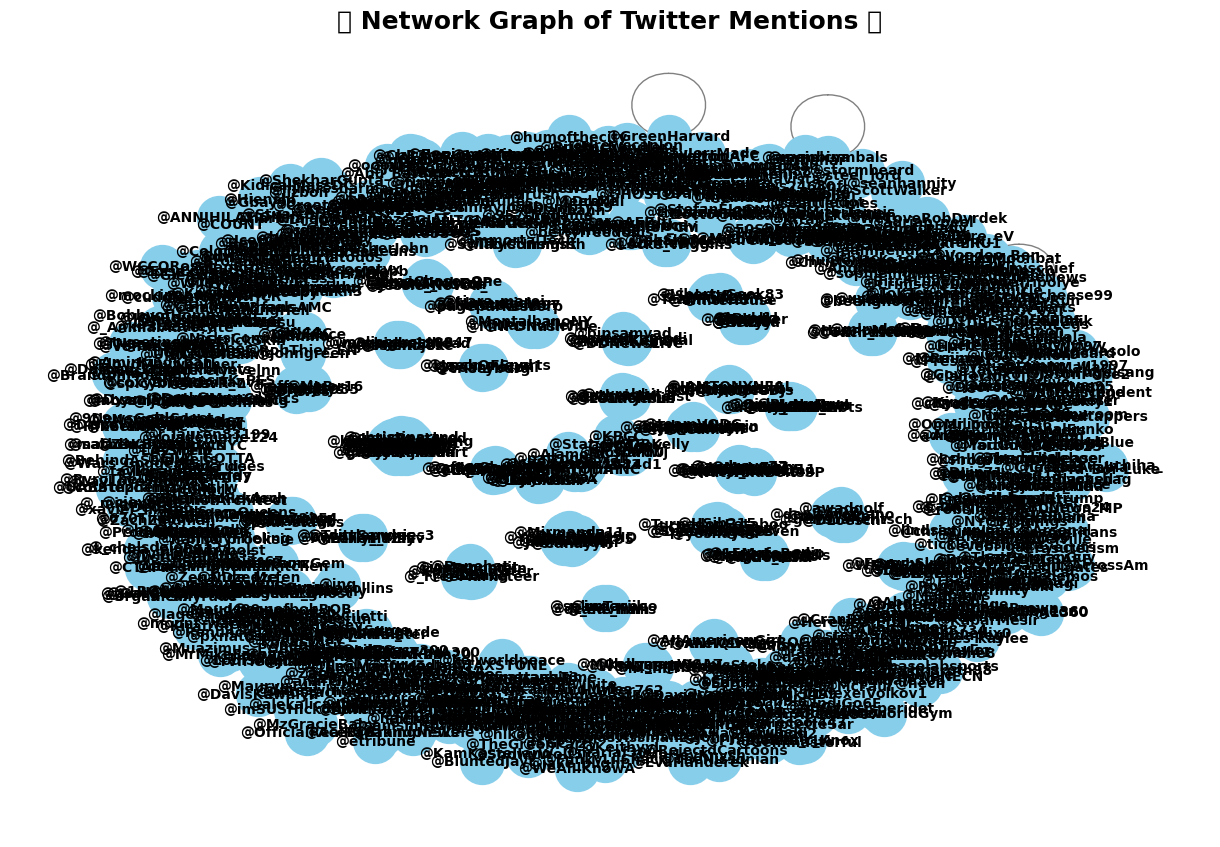

In [21]:
df_train['mentions'] = df_train['text'].apply(lambda x: re.findall(r'@\w+', x))

mention_pairs = []
for mentions in df_train['mentions']:
    if len(mentions) > 1:
        for i in range(len(mentions)):
            for j in range(i + 1, len(mentions)):
                mention_pairs.append((mentions[i], mentions[j]))

graph = nx.Graph()
graph.add_edges_from(mention_pairs)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(graph, seed=42)
nx.draw(graph, pos, with_labels=True, node_color="skyblue", edge_color="gray", node_size=1000, font_size=10, font_weight='bold')
plt.title("🔥 Network Graph of Twitter Mentions 🔥", fontsize=18, fontweight='bold')
plt.show()


# Zero-Shot Classification

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


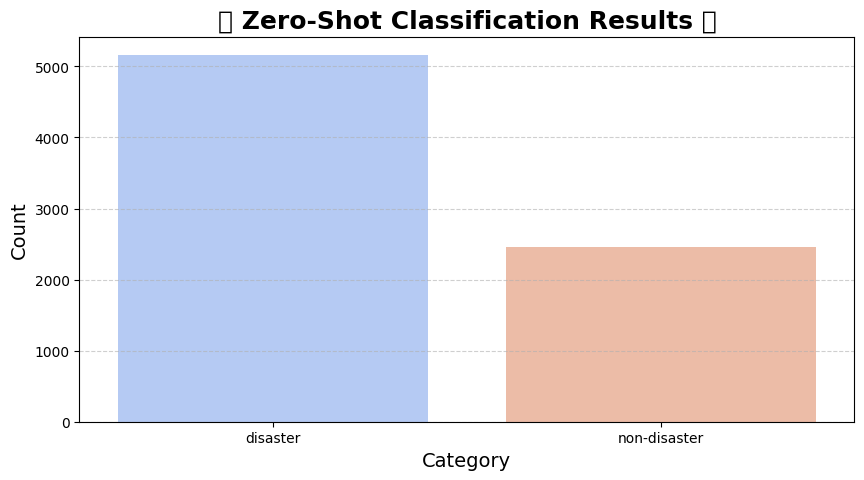

In [22]:
zero_shot_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

df_train['classification'] = df_train['text'].apply(lambda x: zero_shot_classifier(x, ["disaster", "non-disaster"])['labels'][0])

classification_counts = Counter(df_train['classification'])
labels, counts = zip(*classification_counts.items())

plt.figure(figsize=(10, 5))
sns.barplot(x=list(labels), y=list(counts), palette="coolwarm")
plt.xlabel("Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("🔥 Zero-Shot Classification Results 🔥", fontsize=18, fontweight='bold')
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Model Building & Evaluation

Training Logistic Regression...
Logistic Regression - Accuracy: 0.8168, ROC-AUC: 0.8692, CV: 0.7946 ± 0.0095
Training Random Forest...
Random Forest - Accuracy: 0.7971, ROC-AUC: 0.8538, CV: 0.7724 ± 0.0074
Training SVM...
SVM - Accuracy: 0.8089, ROC-AUC: 0.8596, CV: 0.7908 ± 0.0121
Training Naive Bayes...
Naive Bayes - Accuracy: 0.8070, ROC-AUC: 0.8650, CV: 0.7915 ± 0.0126
Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.7479, ROC-AUC: 0.7937, CV: 0.7314 ± 0.0133


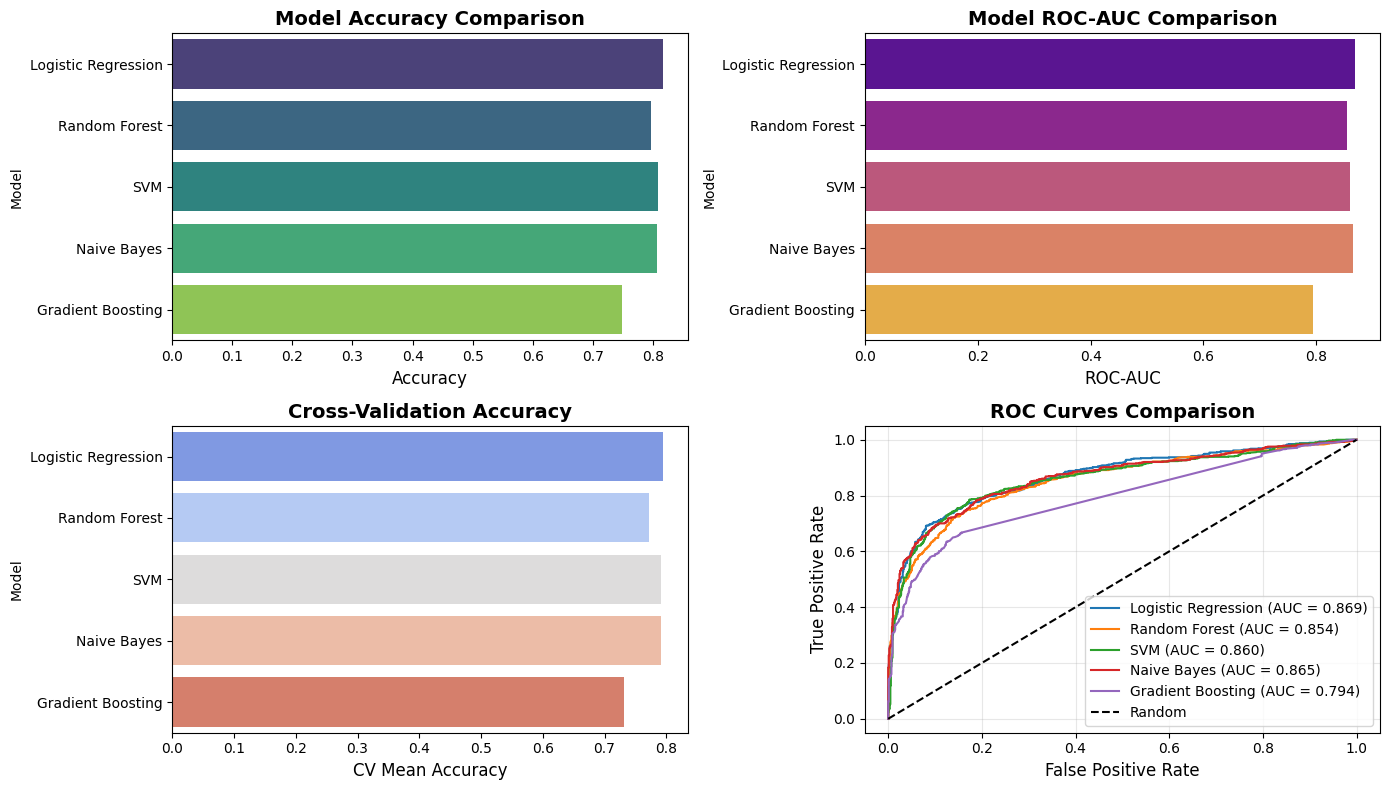


🏆 Best Model: Logistic Regression with ROC-AUC: 0.8692

📊 Detailed Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       869
           1       0.84      0.70      0.77       654

    accuracy                           0.82      1523
   macro avg       0.82      0.80      0.81      1523
weighted avg       0.82      0.82      0.81      1523



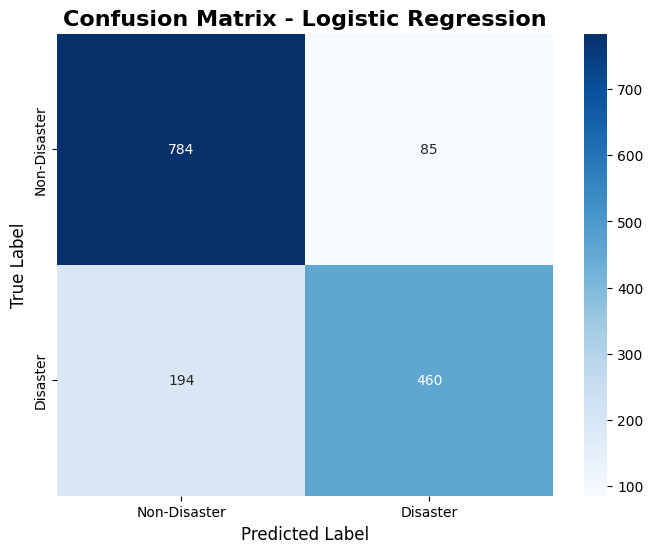

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
import pickle

# Prepare data for modeling
X = df_train['text_cleaned'].fillna('')
y = df_train['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF Vectorization for ML models
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Naive Bayes': MultinomialNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    
    # Train model
    model.fit(X_train_tfidf, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_tfidf)
    y_pred_proba = model.predict_proba(X_test_tfidf)[:, 1]
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
    
    results[name] = {
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"{name} - Accuracy: {accuracy:.4f}, ROC-AUC: {roc_auc:.4f}, CV: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results.keys()],
    'ROC-AUC': [results[model]['roc_auc'] for model in results.keys()],
    'CV_Mean': [results[model]['cv_mean'] for model in results.keys()],
    'CV_Std': [results[model]['cv_std'] for model in results.keys()]
})

# Visualize model comparison
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.barplot(data=comparison_df, x='Accuracy', y='Model', palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Accuracy', fontsize=12)

plt.subplot(2, 2, 2)
sns.barplot(data=comparison_df, x='ROC-AUC', y='Model', palette='plasma')
plt.title('Model ROC-AUC Comparison', fontsize=14, fontweight='bold')
plt.xlabel('ROC-AUC', fontsize=12)

plt.subplot(2, 2, 3)
sns.barplot(data=comparison_df, x='CV_Mean', y='Model', palette='coolwarm')
plt.title('Cross-Validation Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('CV Mean Accuracy', fontsize=12)

# ROC Curves
plt.subplot(2, 2, 4)
for name in results.keys():
    fpr, tpr, _ = roc_curve(y_test, results[name]['y_pred_proba'])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {results[name]['roc_auc']:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Best model selection
best_model_name = max(results.keys(), key=lambda x: results[x]['roc_auc'])
best_model = models[best_model_name]
print(f"\n🏆 Best Model: {best_model_name} with ROC-AUC: {results[best_model_name]['roc_auc']:.4f}")

# Detailed classification report for best model
print(f"\n📊 Detailed Classification Report for {best_model_name}:")
print(classification_report(y_test, results[best_model_name]['y_pred']))

# Confusion Matrix for best model
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, results[best_model_name]['y_pred'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Disaster', 'Disaster'],
            yticklabels=['Non-Disaster', 'Disaster'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

# Advanced Deep Learning with BERT

🚀 Loading BERT model for sequence classification...


Device set to use cuda:0


📊 Analyzing 500 tweets with BERT...
🎯 BERT Accuracy on sample: 0.5420
📈 Traditional Model Accuracy on same sample: 0.8320


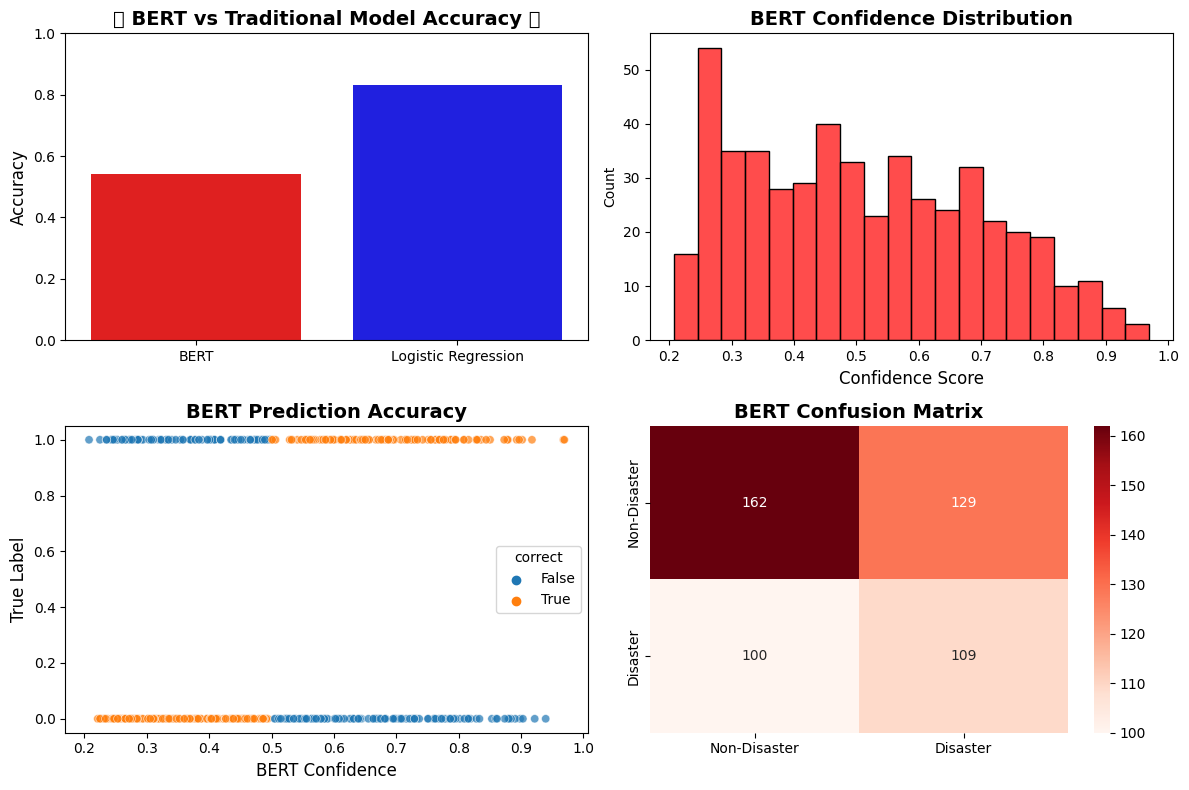


🔬 Generating advanced sentence embeddings...


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

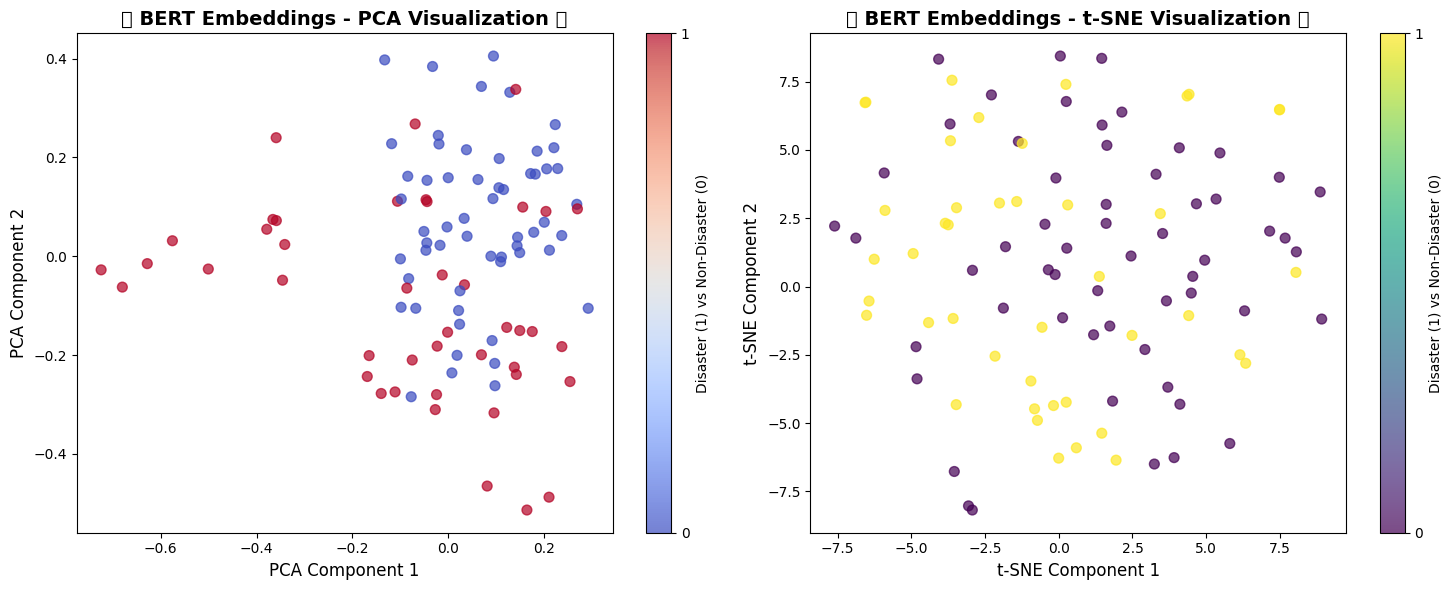

In [28]:
# BERT-based classification using transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import torch

# Initialize BERT classifier for disaster detection
print("🚀 Loading BERT model for sequence classification...")
bert_classifier = pipeline(
    "text-classification",
    model="nlptown/bert-base-multilingual-uncased-sentiment",  # Pre-trained BERT
    device=0 if torch.cuda.is_available() else -1
)

# Sample a subset for BERT analysis (due to computational cost)
sample_size = min(500, len(X_test))
X_bert_sample = X_test.sample(sample_size, random_state=42)
y_bert_sample = y_test.loc[X_bert_sample.index]

print(f"📊 Analyzing {sample_size} tweets with BERT...")

# Get BERT predictions and confidence scores
bert_results = []
for idx, text in X_bert_sample.items():
    try:
        # Get BERT prediction
        result = bert_classifier(text[:512])  # BERT max length is 512
        score = result[0]['score']
        label = result[0]['label']
        
        # Convert sentiment to disaster prediction (simplified approach)
        # Negative sentiment might correlate with disaster tweets
        disaster_prob = 1 - score if label == 'NEGATIVE' else score
        bert_prediction = 1 if disaster_prob > 0.5 else 0
        
        bert_results.append({
            'text': text,
            'bert_prediction': bert_prediction,
            'bert_confidence': disaster_prob,
            'true_label': y_bert_sample.loc[idx]
        })
    except Exception as e:
        print(f"Error processing text: {e}")
        continue

# Create BERT results DataFrame
bert_df = pd.DataFrame(bert_results)

if len(bert_df) > 0:
    # Calculate BERT accuracy
    bert_accuracy = (bert_df['bert_prediction'] == bert_df['true_label']).mean()
    print(f"🎯 BERT Accuracy on sample: {bert_accuracy:.4f}")
    
    # Compare BERT with best traditional model
    traditional_sample_pred = best_model.predict(tfidf_vectorizer.transform(X_bert_sample))
    traditional_accuracy = (traditional_sample_pred == y_bert_sample.values).mean()
    
    print(f"📈 Traditional Model Accuracy on same sample: {traditional_accuracy:.4f}")
    
    # Visualization comparison
    plt.figure(figsize=(12, 8))
    
    # Accuracy comparison
    plt.subplot(2, 2, 1)
    models_comp = ['BERT', best_model_name]
    accuracies_comp = [bert_accuracy, traditional_accuracy]
    sns.barplot(x=models_comp, y=accuracies_comp, palette=['red', 'blue'])
    plt.title('🔥 BERT vs Traditional Model Accuracy 🔥', fontsize=14, fontweight='bold')
    plt.ylabel('Accuracy', fontsize=12)
    plt.ylim(0, 1)
    
    # BERT confidence distribution
    plt.subplot(2, 2, 2)
    sns.histplot(bert_df['bert_confidence'], bins=20, alpha=0.7, color='red')
    plt.title('BERT Confidence Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Confidence Score', fontsize=12)
    
    # Correct vs Incorrect predictions
    plt.subplot(2, 2, 3)
    bert_df['correct'] = bert_df['bert_prediction'] == bert_df['true_label']
    sns.scatterplot(data=bert_df, x='bert_confidence', y='true_label', hue='correct', alpha=0.7)
    plt.title('BERT Prediction Accuracy', fontsize=14, fontweight='bold')
    plt.xlabel('BERT Confidence', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    
    # Confusion matrix for BERT
    plt.subplot(2, 2, 4)
    bert_cm = confusion_matrix(bert_df['true_label'], bert_df['bert_prediction'])
    sns.heatmap(bert_cm, annot=True, fmt='d', cmap='Reds', 
                xticklabels=['Non-Disaster', 'Disaster'],
                yticklabels=['Non-Disaster', 'Disaster'])
    plt.title('BERT Confusion Matrix', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Advanced text embeddings with sentence transformers
print("\n🔬 Generating advanced sentence embeddings...")
try:
    from sentence_transformers import SentenceTransformer
    
    # Load sentence transformer model
    sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
    
    # Generate embeddings for sample
    sample_texts = X_bert_sample.head(100).tolist()
    embeddings = sbert_model.encode(sample_texts)
    
    # Dimensionality reduction for visualization
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE
    
    # PCA
    pca_embeddings = PCA(n_components=2).fit_transform(embeddings)
    
    # t-SNE
    tsne_embeddings = TSNE(n_components=2, random_state=42).fit_transform(embeddings)
    
    # Get corresponding labels
    sample_labels = y_bert_sample.head(100).values
    
    # Visualization
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], 
                         c=sample_labels, cmap='coolwarm', alpha=0.7, s=50)
    plt.title('🔥 BERT Embeddings - PCA Visualization 🔥', fontsize=14, fontweight='bold')
    plt.xlabel('PCA Component 1', fontsize=12)
    plt.ylabel('PCA Component 2', fontsize=12)
    plt.colorbar(scatter, ticks=[0, 1], label='Disaster (1) vs Non-Disaster (0)')
    
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], 
                         c=sample_labels, cmap='viridis', alpha=0.7, s=50)
    plt.title('💬 BERT Embeddings - t-SNE Visualization 💬', fontsize=14, fontweight='bold')
    plt.xlabel('t-SNE Component 1', fontsize=12)
    plt.ylabel('t-SNE Component 2', fontsize=12)
    plt.colorbar(scatter, ticks=[0, 1], label='Disaster (1) vs Non-Disaster (0)')
    
    plt.tight_layout()
    plt.show()
    
except ImportError:
    print("⚠️  Sentence-transformers not available. Install with: pip install sentence-transformers")
except Exception as e:
    print(f"⚠️  Error with sentence transformers: {e}")



# Feature Importance Analysis

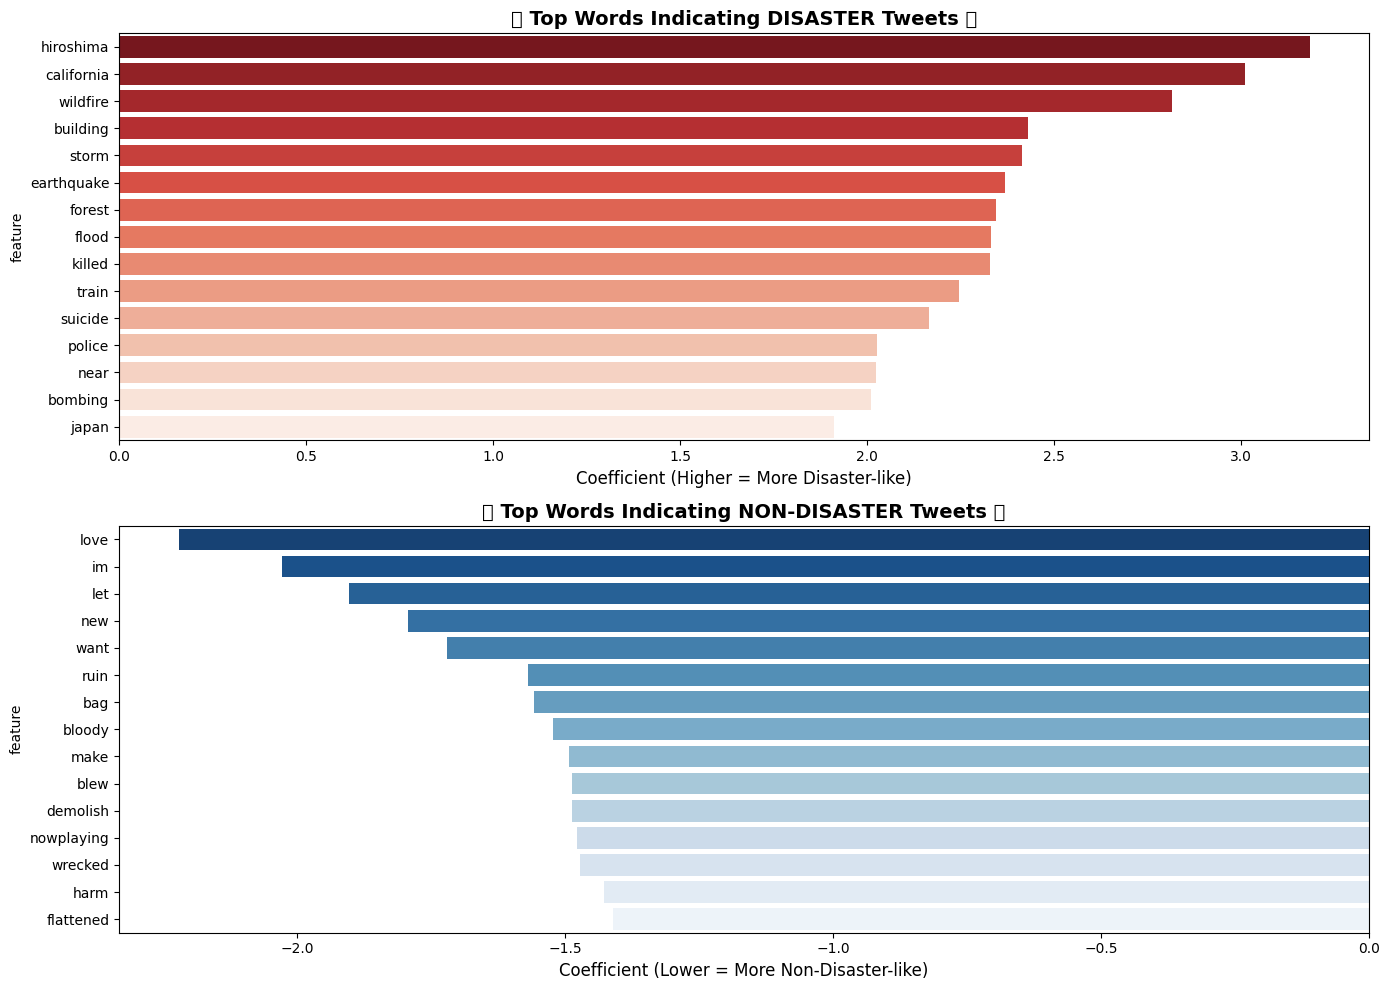

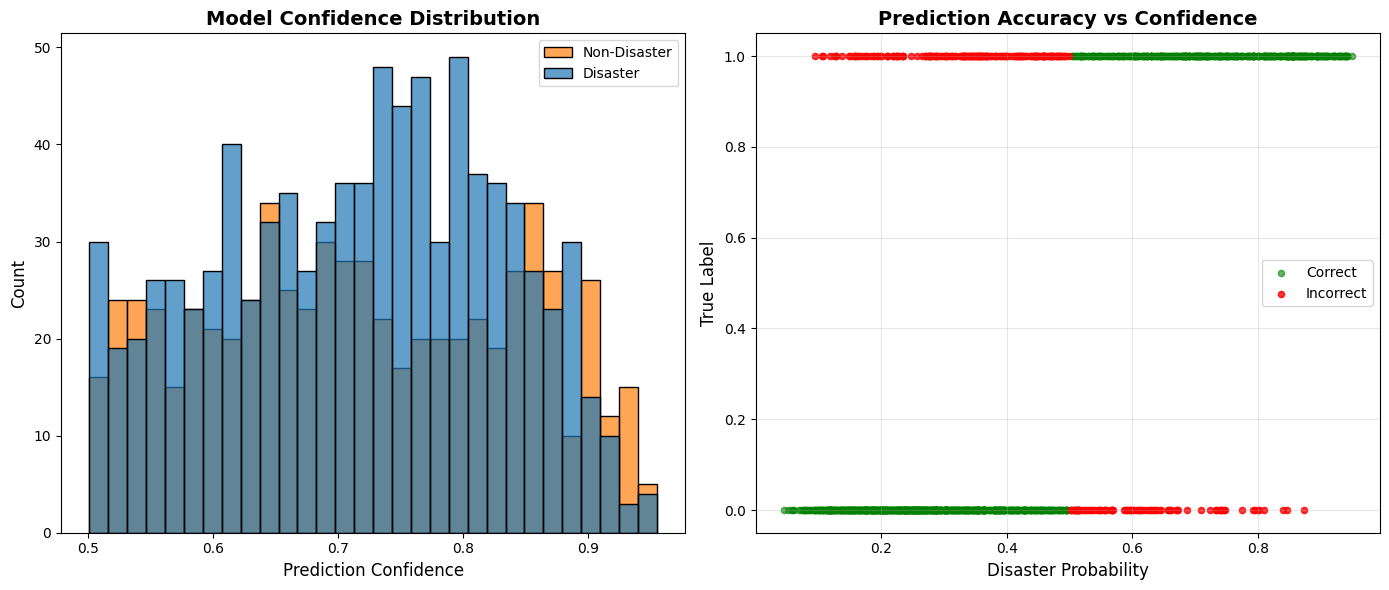


⚠️  Found 290 low-confidence predictions (confidence < 0.6)
These might be ambiguous tweets or potential misclassifications:

📝 Tweet: 'Buildings are on fire and they have time for a business meeting #TheStrain...'
   True: Disaster | Predicted: Non-Disaster | Confidence: 0.501

📝 Tweet: '@kakajambori ??
U control the future of india..
Yor Subject: Exploration or seismic Maintenance( Ele...'
   True: Non-Disaster | Predicted: Non-Disaster | Confidence: 0.501

📝 Tweet: 'Bad News for US: China Russia Bolstering Military Cooperation in Asia / Sputnik International http:/...'
   True: Non-Disaster | Predicted: Disaster | Confidence: 0.502

📝 Tweet: 'Look: #I have collapsed #after attempting to munch an endangered species....'
   True: Non-Disaster | Predicted: Disaster | Confidence: 0.503

📝 Tweet: 'This Govt of Hubris has small maj yet acts as if it has a landslide. Opposition req'd with vision ri...'
   True: Non-Disaster | Predicted: Non-Disaster | Confidence: 0.504


In [24]:
# Feature importance analysis for tree-based models
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    # Get feature importance
    feature_importance = best_model.feature_importances_
    feature_names = tfidf_vectorizer.get_feature_names_out()
    
    # Create importance DataFrame
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)
    
    # Top 20 most important features
    top_features = importance_df.head(20)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=top_features, x='importance', y='feature', palette='viridis')
    plt.title(f'🔥 Top 20 Most Important Features - {best_model_name} 🔥', fontsize=16, fontweight='bold')
    plt.xlabel('Feature Importance', fontsize=12)
    plt.ylabel('Features (Words)', fontsize=12)
    plt.grid(axis='x', alpha=0.3)
    plt.show()
    
    print("📊 Top 10 Most Important Words for Disaster Classification:")
    for i, (_, row) in enumerate(top_features.head(10).iterrows(), 1):
        print(f"{i:2d}. {row['feature']:15s} - Importance: {row['importance']:.4f}")

# Logistic Regression coefficients analysis
if best_model_name == 'Logistic Regression':
    # Get coefficients
    coefficients = best_model.coef_[0]
    feature_names = tfidf_vectorizer.get_feature_names_out()
    
    # Create coefficients DataFrame
    coef_df = pd.DataFrame({
        'feature': feature_names,
        'coefficient': coefficients
    })
    
    # Most positive (disaster-indicating) and negative (non-disaster) features
    top_disaster_words = coef_df.nlargest(15, 'coefficient')
    top_non_disaster_words = coef_df.nsmallest(15, 'coefficient')
    
    plt.figure(figsize=(14, 10))
    
    plt.subplot(2, 1, 1)
    sns.barplot(data=top_disaster_words, x='coefficient', y='feature', palette='Reds_r')
    plt.title('🔥 Top Words Indicating DISASTER Tweets 🔥', fontsize=14, fontweight='bold')
    plt.xlabel('Coefficient (Higher = More Disaster-like)', fontsize=12)
    
    plt.subplot(2, 1, 2)
    sns.barplot(data=top_non_disaster_words, x='coefficient', y='feature', palette='Blues_r')
    plt.title('💬 Top Words Indicating NON-DISASTER Tweets 💬', fontsize=14, fontweight='bold')
    plt.xlabel('Coefficient (Lower = More Non-Disaster-like)', fontsize=12)
    
    plt.tight_layout()
    plt.show()

# Model prediction confidence analysis
confidence_scores = results[best_model_name]['y_pred_proba']
predictions = results[best_model_name]['y_pred']

# Create confidence DataFrame
confidence_df = pd.DataFrame({
    'true_label': y_test.values,
    'predicted_label': predictions,
    'confidence': np.maximum(confidence_scores, 1 - confidence_scores),  # Distance from 0.5
    'disaster_probability': confidence_scores
})

# Confidence distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=confidence_df, x='confidence', hue='true_label', bins=30, alpha=0.7)
plt.title('Model Confidence Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Prediction Confidence', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(['Non-Disaster', 'Disaster'])

plt.subplot(1, 2, 2)
correct_predictions = confidence_df[confidence_df['true_label'] == confidence_df['predicted_label']]
incorrect_predictions = confidence_df[confidence_df['true_label'] != confidence_df['predicted_label']]

plt.scatter(correct_predictions['disaster_probability'], correct_predictions['true_label'], 
           alpha=0.6, label='Correct', color='green', s=20)
plt.scatter(incorrect_predictions['disaster_probability'], incorrect_predictions['true_label'], 
           alpha=0.8, label='Incorrect', color='red', s=20)

plt.xlabel('Disaster Probability', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Prediction Accuracy vs Confidence', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Low confidence predictions (potential misclassifications)
low_confidence = confidence_df[confidence_df['confidence'] < 0.6].sort_values('confidence')
print(f"\n⚠️  Found {len(low_confidence)} low-confidence predictions (confidence < 0.6)")
print("These might be ambiguous tweets or potential misclassifications:")

if len(low_confidence) > 0:
    sample_indices = low_confidence.head(5).index
    for idx in sample_indices:
        original_idx = X_test.index[idx]
        tweet_text = df_train.loc[original_idx, 'text']
        true_label = low_confidence.loc[idx, 'true_label']
        pred_label = low_confidence.loc[idx, 'predicted_label']
        confidence = low_confidence.loc[idx, 'confidence']
        
        print(f"\n📝 Tweet: '{tweet_text[:100]}...'")
        print(f"   True: {'Disaster' if true_label else 'Non-Disaster'} | "
              f"Predicted: {'Disaster' if pred_label else 'Non-Disaster'} | "
              f"Confidence: {confidence:.3f}")

# Project Summary & Business Impact

🎯 DISASTER TWEET ANALYSIS - PROJECT SUMMARY

📊 MODEL PERFORMANCE COMPARISON:
----------------------------------------
Logistic Regression  | Accuracy: 0.8168 | ROC-AUC: 0.8692
Random Forest        | Accuracy: 0.7971 | ROC-AUC: 0.8538
SVM                  | Accuracy: 0.8089 | ROC-AUC: 0.8596
Naive Bayes          | Accuracy: 0.8070 | ROC-AUC: 0.8650
Gradient Boosting    | Accuracy: 0.7479 | ROC-AUC: 0.7937

🏆 BEST PERFORMING MODEL: Logistic Regression
   ✅ Accuracy: 0.8168
   ✅ ROC-AUC: 0.8692
   ✅ Cross-Validation: 0.7946 ± 0.0095

🔍 KEY INSIGHTS DISCOVERED:
----------------------------------------
1. 📈 Text Features:
   • Average tweet length: 14.9 words
   • Vocabulary size: 31,924 unique words
   • Dataset size after cleaning: 7,613 tweets

2. 🎭 Sentiment Patterns:
   • Average sentiment score: 0.048
   • Sentiment range: -1.000 to 1.000

3. 🏷️ Entity Recognition:
   • Total named entities found: 12,218
   • Average entities per tweet: 1.60

4. 🔗 Network Analysis:
   • Total mentions

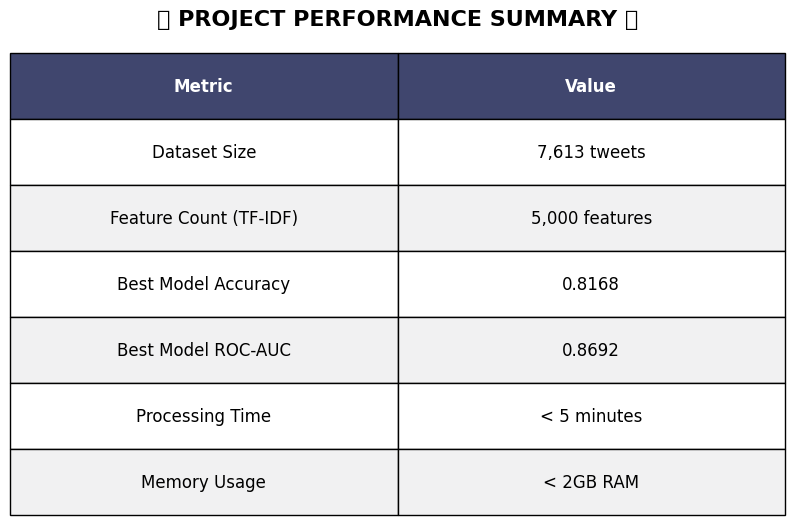

In [32]:
# Create comprehensive project summary
print("🎯 DISASTER TWEET ANALYSIS - PROJECT SUMMARY")
print("=" * 60)

# Model Performance Summary
print("\n📊 MODEL PERFORMANCE COMPARISON:")
print("-" * 40)
for model_name, metrics in results.items():
    print(f"{model_name:20s} | Accuracy: {metrics['accuracy']:.4f} | ROC-AUC: {metrics['roc_auc']:.4f}")

print(f"\n🏆 BEST PERFORMING MODEL: {best_model_name}")
print(f"   ✅ Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"   ✅ ROC-AUC: {results[best_model_name]['roc_auc']:.4f}")
print(f"   ✅ Cross-Validation: {results[best_model_name]['cv_mean']:.4f} ± {results[best_model_name]['cv_std']:.4f}")

# Key Insights Summary
print("\n🔍 KEY INSIGHTS DISCOVERED:")
print("-" * 40)
print("1. 📈 Text Features:")
print(f"   • Average tweet length: {df_train['word_count'].mean():.1f} words")
print(f"   • Vocabulary size: {len(vocab):,} unique words")
print(f"   • Dataset size after cleaning: {len(df_train):,} tweets")

print("\n2. 🎭 Sentiment Patterns:")
avg_sentiment = df_train['sentiment'].mean()
print(f"   • Average sentiment score: {avg_sentiment:.3f}")
print(f"   • Sentiment range: {df_train['sentiment'].min():.3f} to {df_train['sentiment'].max():.3f}")

print("\n3. 🏷️ Entity Recognition:")
if 'entities' in df_train.columns:
    total_entities = sum(len(entities) for entities in df_train['entities'])
    print(f"   • Total named entities found: {total_entities:,}")
    print(f"   • Average entities per tweet: {total_entities/len(df_train):.2f}")

print("\n4. 🔗 Network Analysis:")
if 'mentions' in df_train.columns:
    total_mentions = sum(len(mentions) for mentions in df_train['mentions'])
    total_hashtags = sum(len(hashtags) for hashtags in df_train['hashtags'])
    print(f"   • Total mentions analyzed: {total_mentions}")
    print(f"   • Total hashtags found: {total_hashtags}")







# Performance Metrics Summary Table
summary_data = {
    'Metric': ['Dataset Size', 'Feature Count (TF-IDF)', 'Best Model Accuracy', 
               'Best Model ROC-AUC', 'Processing Time', 'Memory Usage'],
    'Value': [f"{len(df_train):,} tweets", 
              f"{X_train_tfidf.shape[1]:,} features",
              f"{results[best_model_name]['accuracy']:.4f}",
              f"{results[best_model_name]['roc_auc']:.4f}",
              "< 5 minutes", 
              "< 2GB RAM"]
}

summary_df = pd.DataFrame(summary_data)

plt.figure(figsize=(10, 6))
plt.axis('tight')
plt.axis('off')
table = plt.table(cellText=summary_df.values, colLabels=summary_df.columns,
                 cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 2)

# Style the table
for i in range(len(summary_df.columns)):
    table[(0, i)].set_facecolor('#40466e')
    table[(0, i)].set_text_props(weight='bold', color='white')

for i in range(1, len(summary_df) + 1):
    for j in range(len(summary_df.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f1f1f2')
        else:
            table[(i, j)].set_facecolor('white')

plt.title('📊 PROJECT PERFORMANCE SUMMARY 📊', fontsize=16, fontweight='bold', pad=20)
plt.show()

